Assignment 4 - Logistic regression<br>
Author: Thinh Le<br>
Date: February 22, 2025

# Introduction

Assign Project 4 - Using the Python codebased on the Machine Learning in Action book (chapter 5) - modified version attached, adapt the code to perform a logistic regression on the Palmer Penguin dataset. Print coefficients and accuracy metrics (i.e. confusion matrix). Document each step of the code to demonstrate you understand what each block of code does.

# Solution

## Step 1: Import libraries

In [1]:
from ctypes.wintypes import PWORD

# Working with data
import pandas as pd
# Working with arrays, vectors, matrices, lists
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
# Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn import metrics

## Step 2: Read the dataset and drop NAs

First, read the dataset.

In [2]:
# Read the Palmer Penguin cleaned dataset
# Note: place the dataset in the same folder with the jupyter notebook.
penguins_df = pd.read_csv('penguins_clean.csv')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Then drop NAs

In [3]:
# Drop NAs from the penguins_df
penguins_df.dropna(inplace=True)
# inplace=True: Drop NAs from the penguins_df directly without creating a new variable to store the new df

## Step 3: Select columns as independent and dependent variables ($x_1$ to $x_4$, and $y$)

Select columns to use as independent variables: `bill_length_mm` ($x_1$), `bill_depth_mm` ($x_2$), `flipper_length_mm` ($x_3$), `body_mass_g` ($x_4$).<br>

In [4]:
# Select columns as independent variables
X_df = penguins_df[[
    'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'
]]

X_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


Select a column as the dependent variable: `sex` ($y$)<br>
Note: This column only contains male or female values, which is very good for logistic regression.

In [5]:
# Select columns as independent variables
Y_df = penguins_df[['sex']]
Y_df

,sex
0,male
1,female
2,female
4,female
5,male
...,...
339,male
340,female
341,male
342,male


Since the confusion matrix from `sklearn` library only receives numeric values, we will convert male and female values into 0 and 1 values.

In [6]:
# Disable the Downcasting behavior warning message
pd.set_option('future.no_silent_downcasting', True)

# Replace values and convert data type to float for same data type with X
Y_df = Y_df.replace({'male': 0, 'female': 1}).astype(float)
Y_df

,sex
0,0.0
1,1.0
2,1.0
4,1.0
5,0.0
...,...
339,0.0
340,1.0
341,0.0
342,0.0


## Step 4: Normalize data and add bias column (which is for $x_0$ always equal 1) to `X_df`

Since the values of `flipper_length_mm`, `body_mass_g` are bigger than those of `bill_length_mm` and `bill_depth_mm` in `X_df`, we must normalize the data to bring them to a common scale.

Define a function to start normalize data using Min-Max Scaling:

$$
X_{\text{normalized}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

In [7]:
def normalize_df(_matrix):
    # Get min and max values in each column
    min_values = np.min(_matrix, axis=0)
    max_values = np.max(_matrix, axis=0)

    # Calculate range = max - min
    range_values = max_values - min_values

    # Get number of rows
    number_of_matrix_rows = _matrix.shape[0]

    # Repeat min values in each column by the number of rows
    min_matrix = np.tile(min_values, (number_of_matrix_rows, 1))

    # Repeat range values by the number of rows
    range_matrix = np.tile(range_values, (number_of_matrix_rows, 1))

    # Perform min-max normalization: (x - min) / (max - min)
    normalized_matrix = (_matrix - min_matrix) / range_matrix

    return normalized_matrix

normalized_X_matrix = normalize_df(X_df.to_numpy())
print(normalized_X_matrix)

[[0.25454545 0.66666667 0.15254237 0.29166667]
 [0.26909091 0.51190476 0.23728814 0.30555556]
 [0.29818182 0.58333333 0.38983051 0.15277778]
 ...
 [0.63636364 0.60714286 0.3559322  0.29861111]
 [0.68       0.70238095 0.6440678  0.38888889]
 [0.65818182 0.66666667 0.44067797 0.29861111]]


Next, we will add the bias column:

In [8]:
# Insert a column of 1s at index 0 (first column)
# axis=1: insert values by vertical axis
normalized_X_matrix = np.insert(
    normalized_X_matrix, 0, 1, axis=1
)

normalized_X_matrix

array([[1.        , 0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [1.        , 0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [1.        , 0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [1.        , 0.63636364, 0.60714286, 0.3559322 , 0.29861111],
       [1.        , 0.68      , 0.70238095, 0.6440678 , 0.38888889],
       [1.        , 0.65818182, 0.66666667, 0.44067797, 0.29861111]],
      shape=(333, 5))

## Step 5: Create training and testing matrices for the independent and dependent variables (X(s) and Y)

In [9]:
# Create training and testing matrices
# Note:
#   - Convert Y_df to numpy array
#   - test_size = 0.2: 20% of data is used for testing, 80% is used for training
training_X_matrix, testing_X_matrix, training_Y_matrix, testing_Y_matrix = train_test_split(
    normalized_X_matrix, Y_df.to_numpy(), test_size = 0.2, random_state = 0
)

In [10]:
training_X_matrix

array([[1.        , 0.63272727, 0.35714286, 0.88135593, 0.81944444],
       [1.        , 0.41818182, 0.0952381 , 0.76271186, 0.61111111],
       [1.        , 0.48363636, 0.66666667, 0.27118644, 0.22916667],
       ...,
       [1.        , 0.33818182, 0.64285714, 0.50847458, 0.32638889],
       [1.        , 0.36      , 0.76190476, 0.47457627, 0.375     ],
       [1.        , 0.57090909, 0.22619048, 0.72881356, 0.81944444]],
      shape=(266, 5))

In [11]:
testing_X_matrix

array([[1.        , 0.2       , 0.46428571, 0.22033898, 0.25      ],
       [1.        , 0.13090909, 0.45238095, 0.22033898, 0.125     ],
       [1.        , 0.71272727, 0.85714286, 0.37288136, 0.29861111],
       [1.        , 0.22181818, 0.82142857, 0.30508475, 0.33333333],
       [1.        , 0.34545455, 0.58333333, 0.33898305, 0.34722222],
       [1.        , 0.33818182, 0.6547619 , 0.3220339 , 0.27777778],
       [1.        , 0.59636364, 0.11904762, 0.81355932, 0.72222222],
       [1.        , 0.66909091, 0.77380952, 0.49152542, 0.375     ],
       [1.        , 0.52      , 0.29761905, 0.83050847, 0.63888889],
       [1.        , 0.65454545, 0.22619048, 0.89830508, 0.63888889],
       [1.        , 0.65454545, 0.57142857, 0.30508475, 0.19444444],
       [1.        , 0.16727273, 0.67857143, 0.25423729, 0.30555556],
       [1.        , 0.        , 0.28571429, 0.27118644, 0.09722222],
       [1.        , 0.49818182, 0.17857143, 0.6440678 , 0.41666667],
       [1.        , 0.20727273, 0.

In [12]:
training_Y_matrix

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [13]:
testing_Y_matrix

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

## Step 6: Calculate the estimated regression coefficient matrix ($\hat{\beta}$) using the Gradient Ascent method

We already know that the linear model matrix is calculated by this formula:

$$ \hat{Z} = \hat{\beta}X $$

At first, we only have the independent matrix ($X$). We don’t yet have the estimated regression coefficient matrix ($\hat{\beta}$), so we will initialize it with a matrix of ones (according to the book) and then continuously update it until a predefined number of iterations is reached. This process ensures that the model learns the optimal values of $\hat{\beta}$, leading to an accurate logistic regression model.

Create a sigmoid function to calculate the predicted probability matrix ($\hat{P}$), this will map values from the linear matrix ($\hat{Z}$) into a probability range between 0 and 1

$$\hat{P} =  \sigma(\hat{Z}) = \frac{1}{1 + e^{-\hat{Z}}}$$

In [14]:
# Sigmoid function to calculate the predicted value matrix
def calculate_predicted_probability_matrix(Z_hat_matrix):
    return 1.0 / (1 + np.exp(-Z_hat_matrix))

Define a function to calculate the estimated regression coefficient matrix using the Gradient Ascent method with the following steps:

1. Choose a learning rate ($\alpha$) and the number of iterations.
2. Set the regression coefficient matrix ($\hat{\beta}$) to ones.
3. Apply the sigmoid function to obtain predicted probabilities.
4. Compute the gradient using $\nabla L = X^T (Y - \hat{Y})$.
5. Update the coefficients using gradient ascent: $\beta^{(t+1)} = \beta^{(t)} + \alpha \nabla L$.
6. Repeat steps **3-5** for a fixed number of iterations until $\hat{\beta}$ stabilizes.

In [15]:
# Function to calculate the estimated regression coefficient matrix using the Gradient Ascent method
def calculate_estimated_coefficient_matrix_gradient_ascent(
        _X_matrix,
        _Y_matrix,
        # Step 1: Set a learning rate and the number of iterations
        _alpha = 0.001,   # default value for alpha
        _iterations = 500 # default value for number of iterations
):
    number_of_columns_X_matrix = _X_matrix.shape[1]
    # Transpose matrix X
    transposed_X_matrix = _X_matrix.transpose()

    # Step 2: Init the estimated regression coefficient matrix with ones
    # The number of rows is equal the number of columns from the _X_matrix
    updated_coefficient_matrix = np.ones((number_of_columns_X_matrix, 1))

    # Step 6: Repeat step 3 to 5
    for iteration_index in range(500):
        # Step 3: Apply the sigmoid function to obtain predicted probabilities.
        Z_hat_matrix = np.dot(_X_matrix, updated_coefficient_matrix)
        P_hat_matrix = calculate_predicted_probability_matrix(Z_hat_matrix)
        # Step 4: Compute the gradient
        residual_matrix = _Y_matrix - P_hat_matrix
        gradient = np.dot(transposed_X_matrix, residual_matrix)
        # Step 5: Update the coefficients using gradient ascent
        updated_coefficient_matrix = updated_coefficient_matrix + (_alpha * gradient)

    return updated_coefficient_matrix

coefficient_matrix = calculate_estimated_coefficient_matrix_gradient_ascent(
    training_X_matrix,
    training_Y_matrix
)

coefficient_matrix

array([[ 2.90250305],
       [-0.83293825],
       [-3.07493012],
       [-0.34073988],
       [-2.50128038]])

## Step 7: Calculate the testing predicted value matrix ($\hat{Y}_{\text{testing}}$)

In [16]:
def calculate_predict_value_matrix(_X_matrix, _coefficient_matrix):
    Z_hat_matrix = np.dot(_X_matrix, _coefficient_matrix)
    P_hat_matrix = calculate_predicted_probability_matrix(Z_hat_matrix)
    # If P > 0.5 then it is female (1), else it is male (0)
    return np.where(P_hat_matrix > 0.5, 1, 0)

testing_Y_hat_matrix = calculate_predict_value_matrix(
    testing_X_matrix, coefficient_matrix
)

testing_Y_hat_matrix

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

## Step 8: Create the confusion matrix

Create the confusion matrix using `metrics` from sklearn library.

In [20]:
# Create the confusion matrix
confusion_matrix = metrics.confusion_matrix(
    testing_Y_matrix, testing_Y_hat_matrix
)

confusion_matrix

array([[28,  1],
       [ 4, 34]])

Plot the confusion matrix:

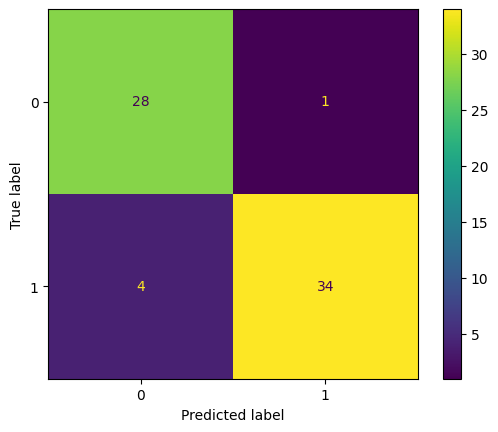

In [24]:
# Plot the confusion matrix using the ConfusionMatrixDisplay() function combine with matplotlib
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix
)

cm_display.plot()
plt.show()

## Step 9: Calculate the sensitivity, specificity, and accuracy

Sensitivity:
$$
  \text{Sensitivity} = \frac{TP}{TP + FN}
$$

Specificity:
$$
  \text{Specificity} = \frac{TN}{TN + FP}
$$

Accuracy:
$$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [28]:
# [0, 0], [1, 1], [0, 1] & [1, 0] are the cell indices from the confusion matrix

tn = confusion_matrix[0,0] # true_males
tp = confusion_matrix[1,1] # true_females
fp = confusion_matrix[0,1] # predicted_females_but_males
fn = confusion_matrix[1,0] # predicted_males_but_females

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / np.sum(confusion_matrix)

print("Accuracy is " + str(accuracy))
print("Sensitivity is " + str(sensitivity) + ", in this case, percentage of correct females")
print("Specificity is " + str(specificity)  + ", in this case, percentage of correct males")

Accuracy is 0.9253731343283582
Sensitivity is 0.8947368421052632, in this case, percentage of correct females
Specificity is 0.9655172413793104, in this case, percentage of correct males
